In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


1. 데이터 확인 - 비어있는값 확인
2. Column 분석 - 상관관계, 개별분석 .describe()
3. Feature Engineer - class나누기, 구간 나누기, 텍스트 데이터 처리 등
4. 머신러닝 활용하여 모델 만들기
5. 모델 학습 및 예측
6. 모델 평가 - 성능평가 


In [3]:
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# **1. 데이터 확인**

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**1.1 NaN 값 확인**

80% 정도면 모델 학습에 포함시키지 않는다.

In [7]:
for col in df_train.columns: 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format (
        col, 
        100*(df_train[col].isnull().sum()/df_train[col].shape[0])
    )
    # printf("column: %10s\t Percent of NaN value: %.2f%%\n", col, percent); C언어 처럼 메세지 포맷하는법.
    # .isnull 빈값을 True/False 로 반환 => .sum(): True를 1로 계산하여 빈값을 구한다.
    # df.shape[0] 전체 행의 개수. df.shape[1] 전체 열의 개수. df.shape -> (행 개수, 열 개수)
    print(msg);

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [8]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 
        100*(df_test[col].isnull().sum()/df_test[col].shape[0])
    )
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


Mano 라이브러리: 빈값찾기에 유용함 

<Axes: >

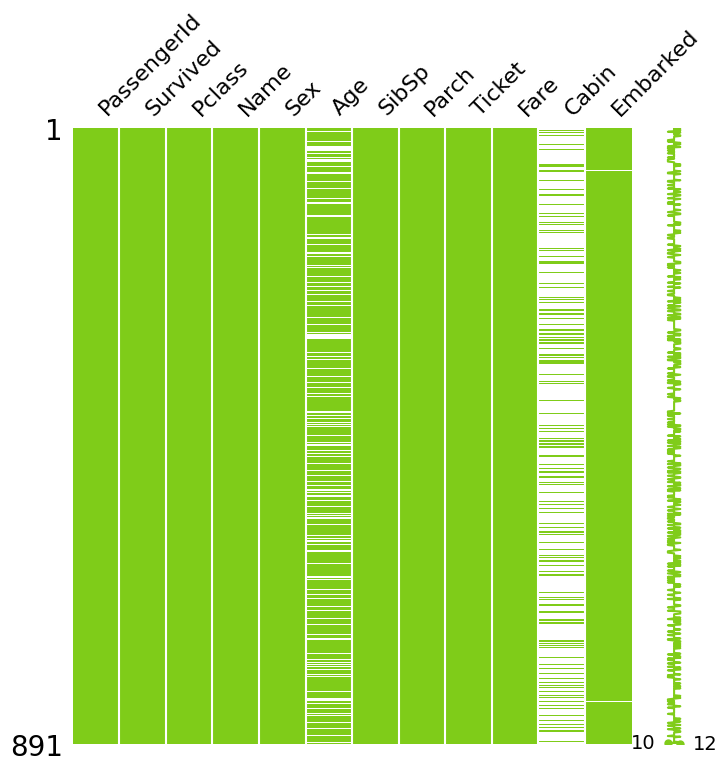

In [9]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.8, 0.1))

<Axes: >

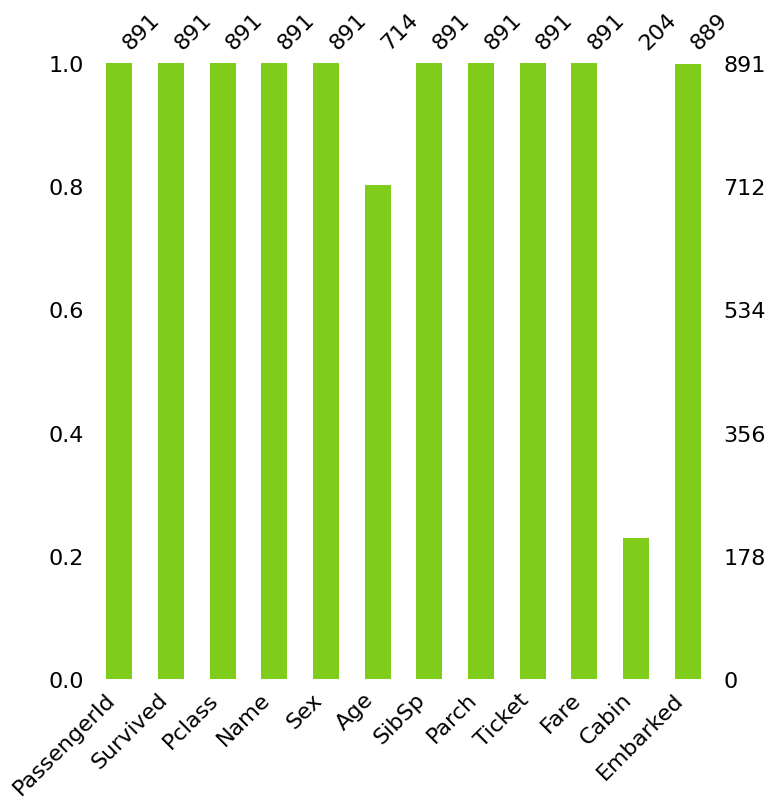

In [10]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.8, 0.1))

<Axes: >

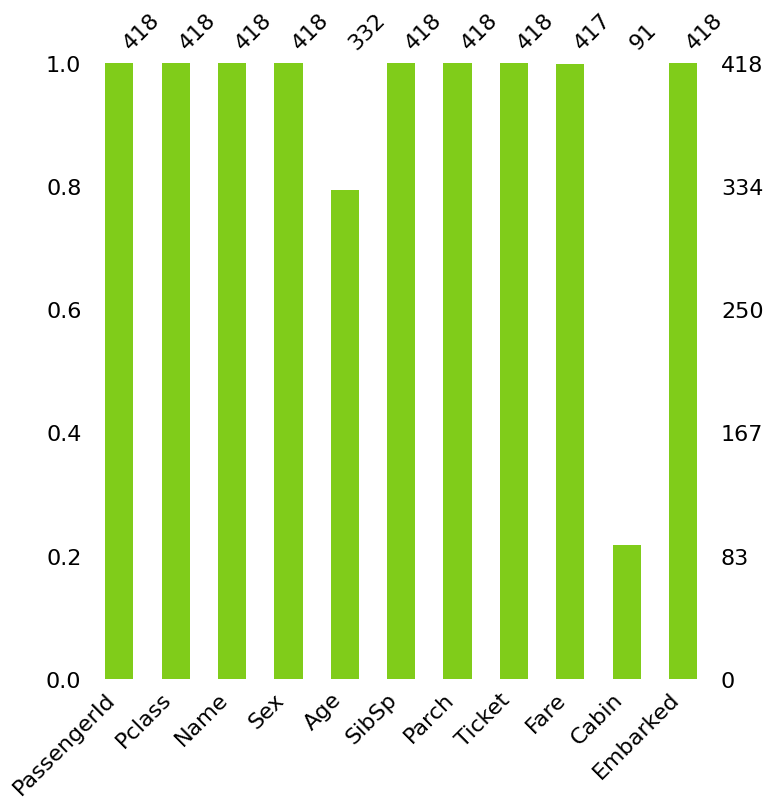

In [11]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.5, 0.8, 0.1))

Text(0.5, 1.0, 'Count plot - Survived')

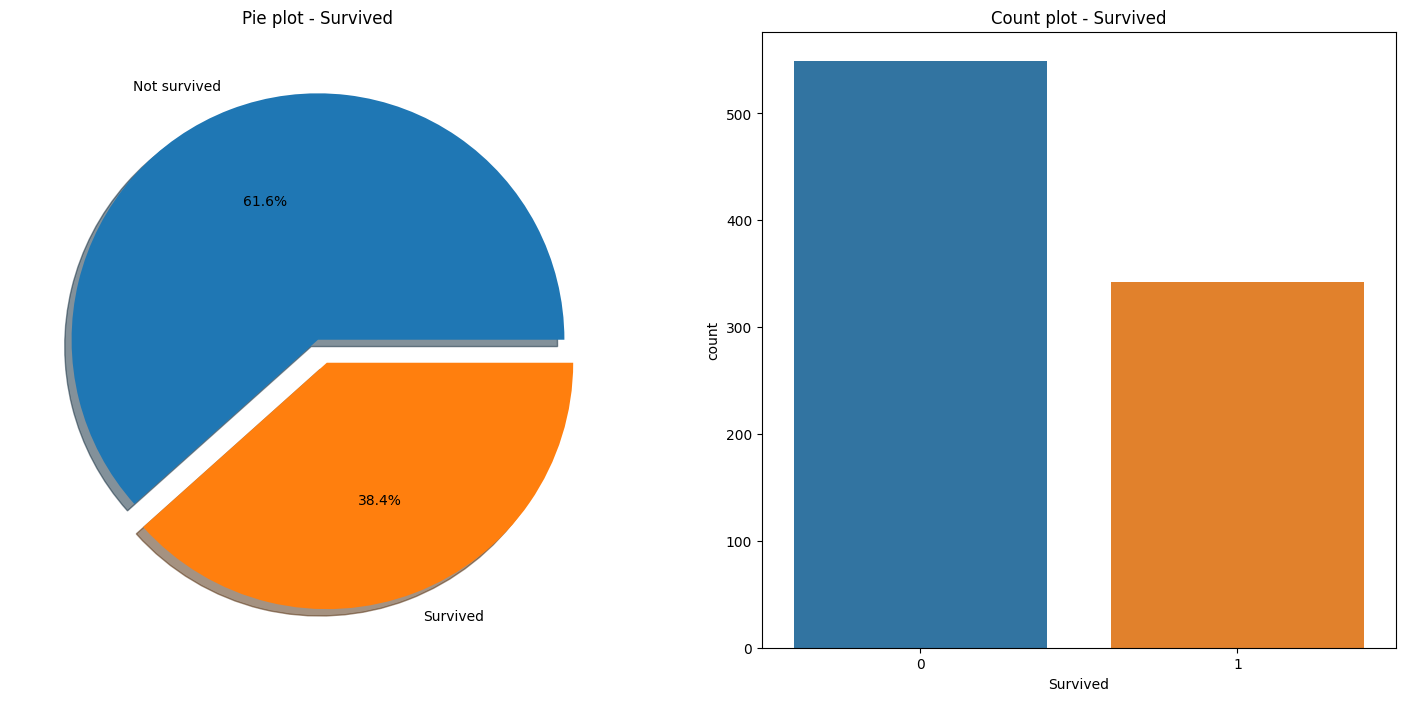

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# f: 전체 figure, ax: ax[0], ax[1] 각각 그래프 
# .subplots(1,2) : 1행 2열 2개의 그래프 

df_train['Survived'].value_counts().plot.pie(
    labels = ['Not survived', 'Survived'],
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') # y축 제목 없음으로

sns.countplot(x='Survived', data=df_train, ax=ax[1])
# x='column name' -> the column name should be same as x='column name'
ax[1].set_title('Count plot - Survived')

# 2. 데이터 분석

**Pclass**

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
# Pclass와 Survived 열만 포함한 DF를 Pclass 기준으로 그룹(groupby)한뒤, Pclass를 인덱스가 되도록한다.
# count는 0,1 생존 여부 상관없이 모두 센다

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()
# sum 은 0,1 더한 값이기 때문에 생존자의 수를 알수있다

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

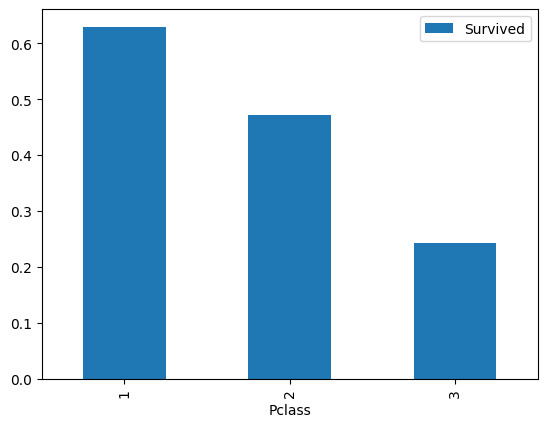

In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
# 여기 mean 을 하면 생존율이 나오는 이유는 생존한사람 수(1+0+0+0+1)/모든 사람의 수(N) 이기때문에

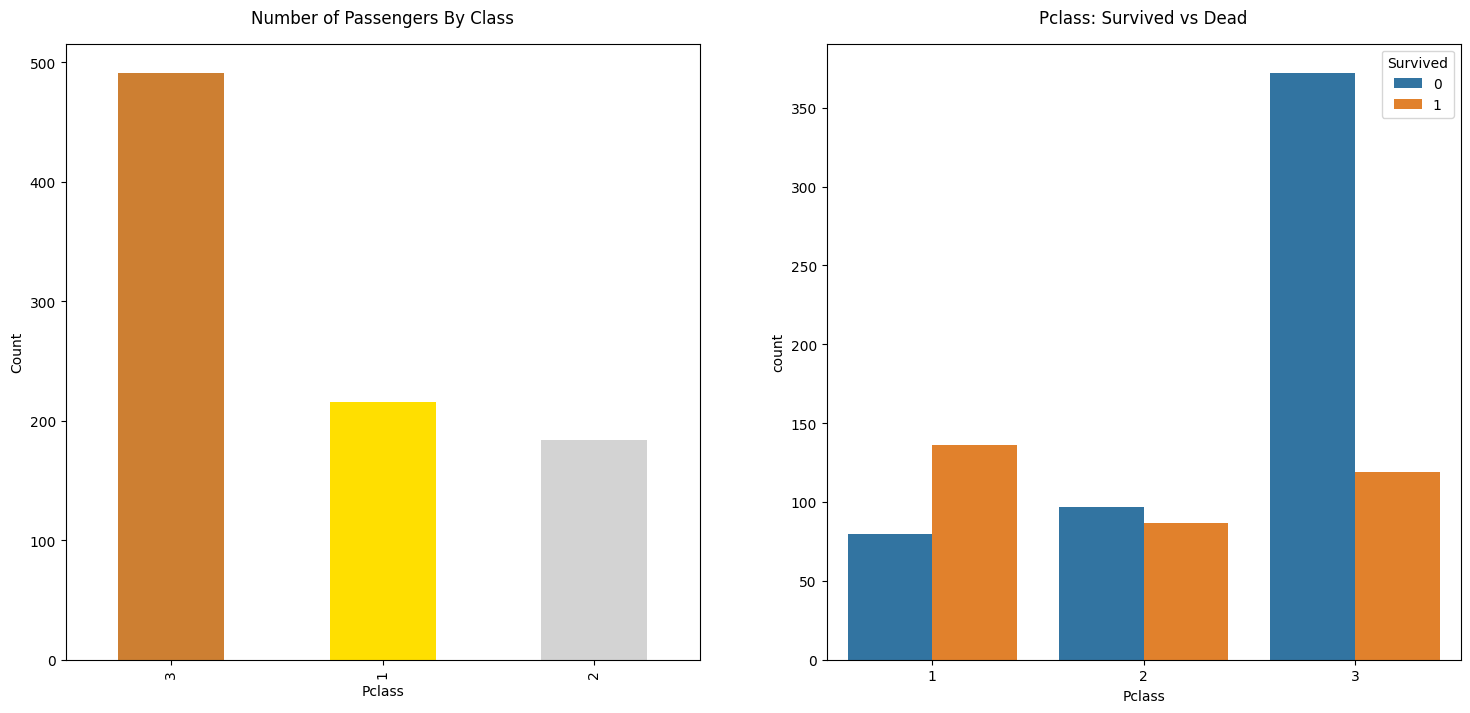

In [17]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# f - Figure
df_train['Pclass'].value_counts().plot.bar(
    color=['#CD7F32','#FFDF00','#D3D3D3'], 
    ax=ax[0]
)
ax[0].set_title('Number of Passengers By Class', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
# x='Pclass': 좌석 등급을 x축에
# hue='Survived': 생존 여부로 색을 나눔 (0=사망, 1=생존)
# countplot은 자동으로 각각의 개수를 세어줌
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


**Sex**

Text(0.5, 1.0, 'Sex: Survived vs Dead')

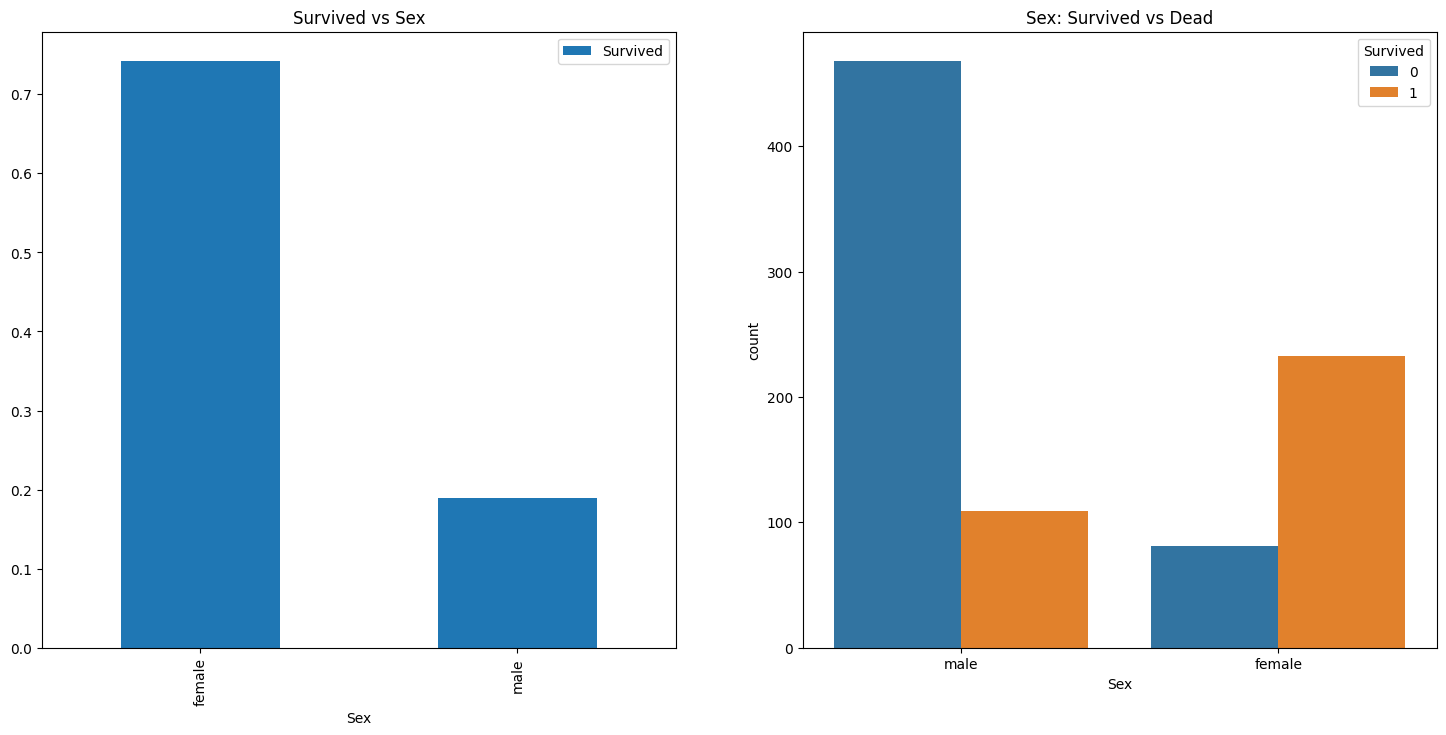

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

In [19]:
df_train[['Sex', 'Survived']].groupby(
    ['Sex'], as_index=False
).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
pd.crosstab(
    df_train['Sex'], 
    df_train['Survived'],
    margins=True
).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


**Sex & Pclass**

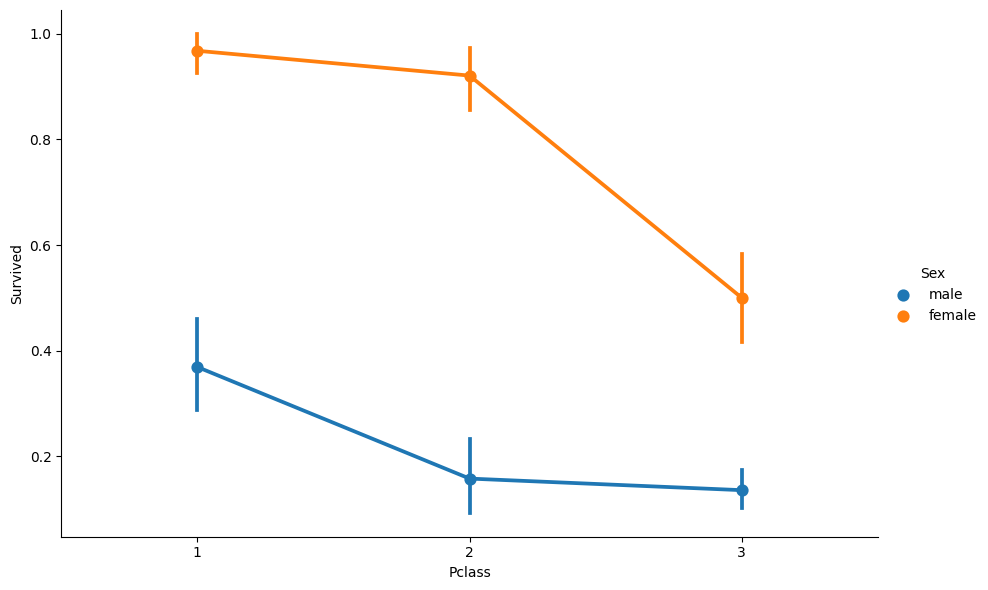

In [21]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=6, aspect=1.5)
# CATegorical data PLOT

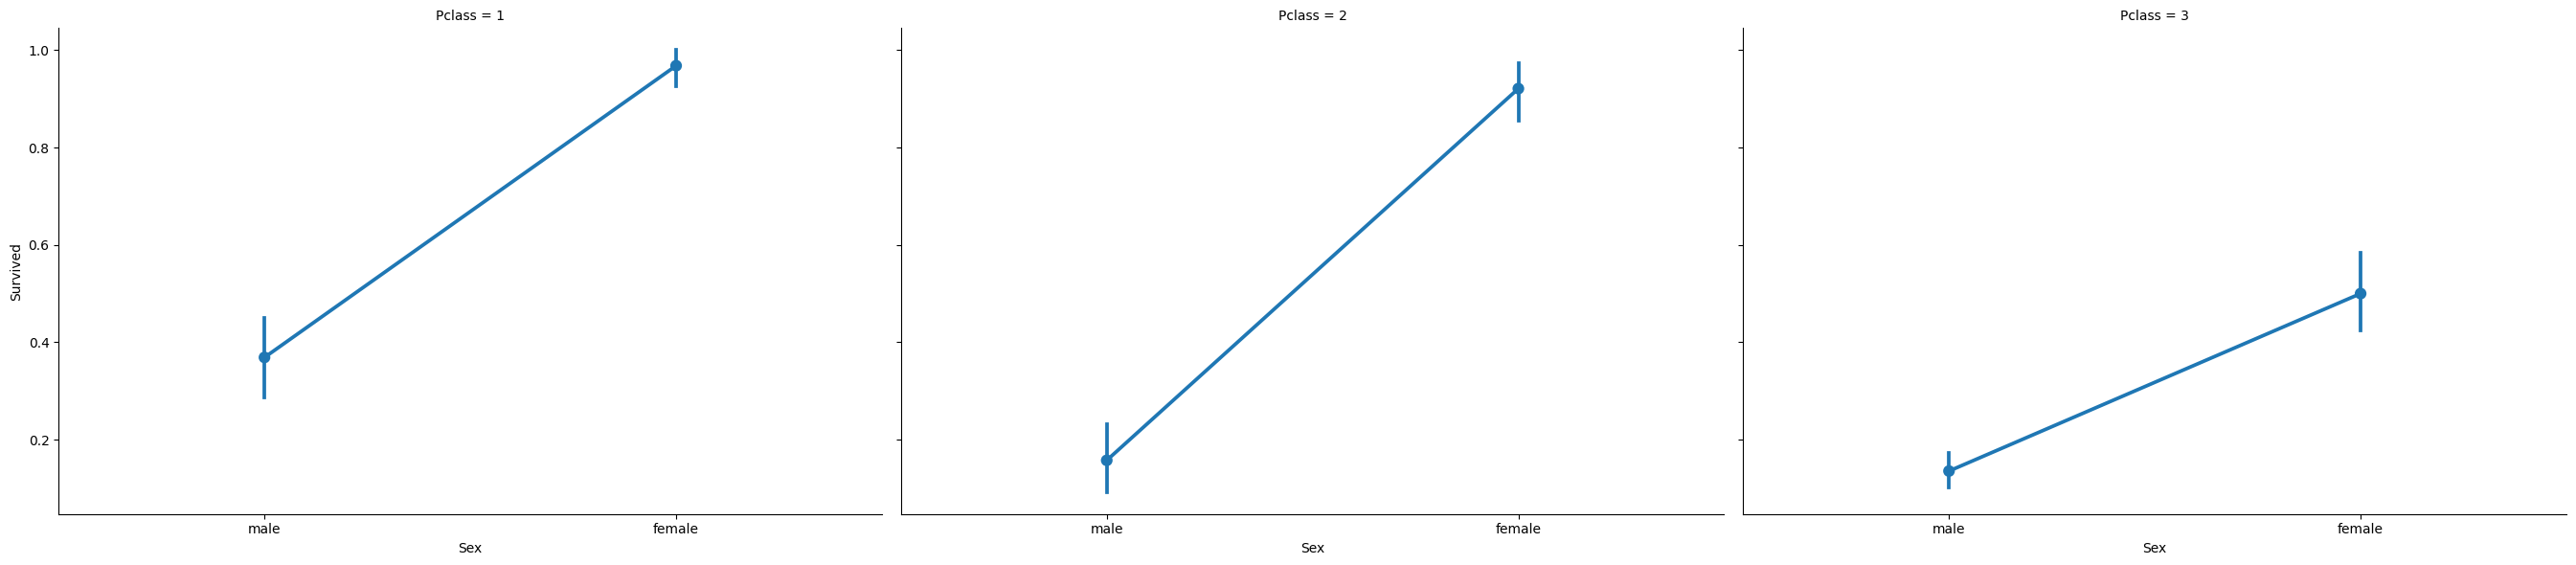

In [22]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='point', height=6, aspect=1.5)

**Age**

In [23]:
print('Oldest Passenger: {:.1f} Years'.format(df_train['Age'].max()))
print('Younged Passenger: {:.1f} Years'.format(df_train['Age'].min()))
print('Average Passenger: {:.1f} Years'.format(df_train['Age'].mean()))

Oldest Passenger: 80.0 Years
Younged Passenger: 0.4 Years
Average Passenger: 29.7 Years


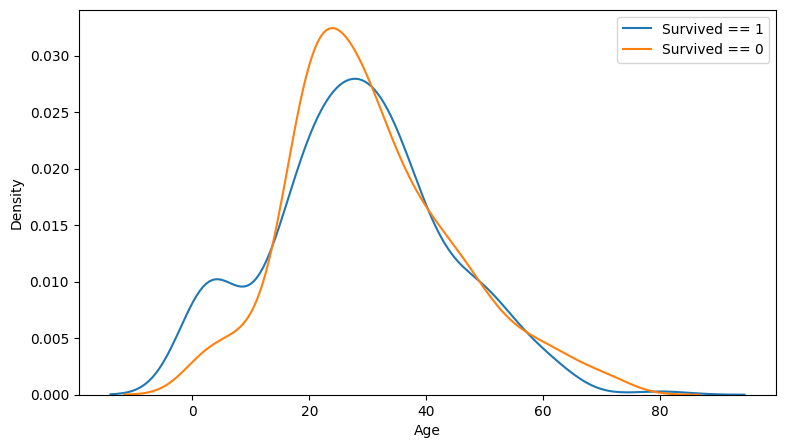

In [24]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
# True인 행을 골라낸뒤에, 그행의 Age를 반환한다. 
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()
#Kernel Density Estimation 그래프를 곡선화로 보여준다.

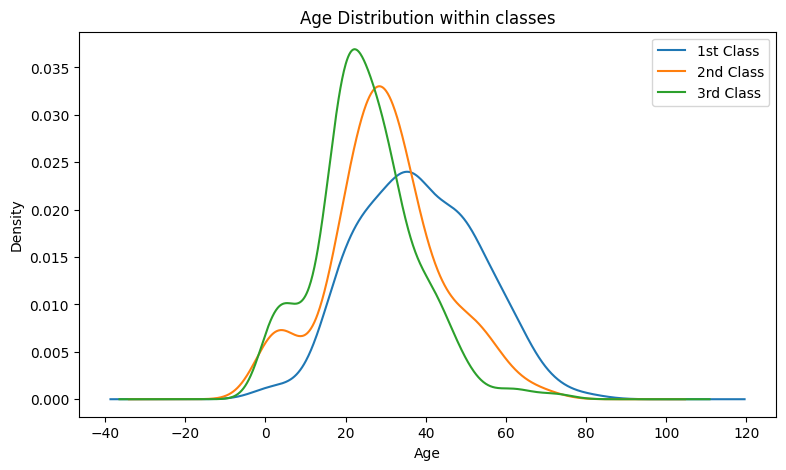

In [25]:
f, ax = plt.subplots(1, 1, figsize=(9,5))
#sns.kdeplot(df_train[df_train['Pclass']==1]['Age'], ax=ax) -> Pandas lib, 
#df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde') -> Seaborn lib
df_train.loc[df_train['Pclass']==1, 'Age'].plot(kind='kde')
# 데이터 필터링하고 선택할때 다음과같은 함수를 쓰는것이 안전하다. 
# 위의 df['Age'][조건] or df[조건]['Age'] 방식은 비추천
#loc : location by label
#iloc: integer location
df_train.loc[df_train['Pclass']==2, 'Age'].plot(kind='kde')
df_train.loc[df_train['Pclass']==3, 'Age'].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

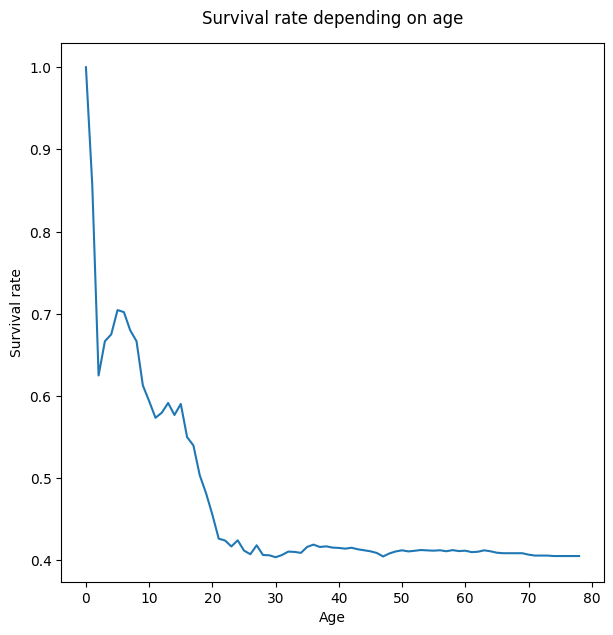

In [26]:
# 누적 그래프를 사용하는이유: df_train[]==i를 사용하면 딱 i살 사람만 필터링이되어 그래프가 많이 들쭉날쭉 할수있다. 
# 0-i 살 까지 누적그래프를 사용하면 생존률이 증감하는지 쉽게 볼수있다.

cummulate_survival_ratio=[]
# 생존률을 저장할 리스트

for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train['Age']<i]['Survived'].sum() / 
        # i살 미만인 사람들의 총 인원수 (1,0,1,1,0) 합하면 살아남은 인원 수
        
        # df_train[df_train['Age']<i]
        # True/False 조건으로 x번, y번 행만 남기고 'Survived' 열 선택
        # df[[True, False, True]]['Survived']
        
        len(df_train[df_train['Age']<i]['Survived'])
        # df_train[df_train<i] 대신에 df_train[df_train<i]['Survived'] 여기 Survived를 붙이는이유는
        # df_train[df_train<i]는 모든 행을 세지만
        # Survived 행에 NaN 있다면 그 행은 제외시키기 때문에 

    )
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate depending on age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Age')
plt.show()
    

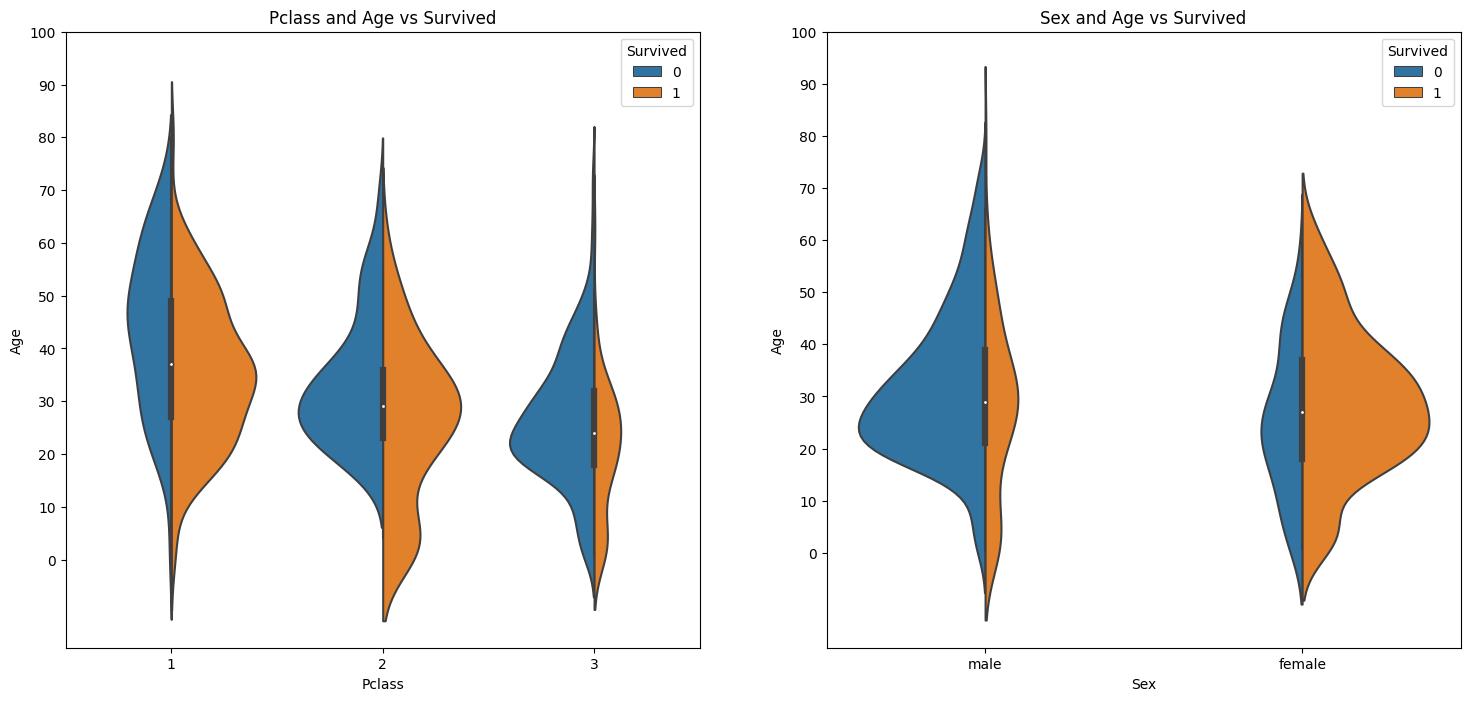

In [27]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
# split=True 두가지의 값만 가진 열이 있을때 좌/우를 나눠서 데이터를 각각 표현한다
# scale='count' 데이터 개수를 세서 두깨를 나타낸다. 'area': 전체 바이올린의 면적을 같은 크기, 'width':모든 바이올린의 폭을 동일하게

ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) # range 는 끝값을 포함하지 않아 110까지라고 적음.

sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10)) # range 는 끝값을 포함하지 않아 110까지라고 적음.

plt.show()

df[]: 오직 하나의 열만 선택, 반환값 series

df[[]]: 여러 열을 리스트로 선택, 반환값 data frame

<Axes: xlabel='Embarked'>

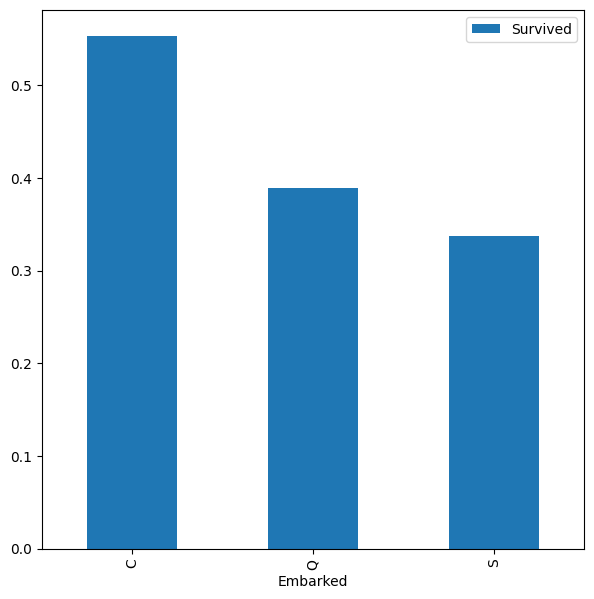

In [28]:
# 생존 - 탑승구
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']] \
.groupby(['Embarked'], as_index=True) \
.mean() \
.sort_values(by='Survived', ascending=False) \
.plot.bar(ax=ax)

# .sort_values(by='Survived', ascending=False) → 생존률이 높은 순서로 정렬합니다.

| 목적            | 사용하는 함수           | 결과 예시                                           |
| ------------- | ----------------- | ----------------------------------------------- |
| 생존률(평균값) 비교   | `plot.bar()`      | 평균값: 0.55, 0.39 등                               |
| 인원수(카운트) 비교   | `sns.countplot()` | 사람 수: 150명, 120명 등                              |
| 수치형 데이터 시각화   | `plot` 계열         | `.plot.line()`, `.plot.bar()`, `.plot.hist()` 등 |
| 범주형 변수 개수 시각화 | `sns.countplot()` | Seaborn 스타일로 예쁘고 hue로 분류도 쉬움                    |


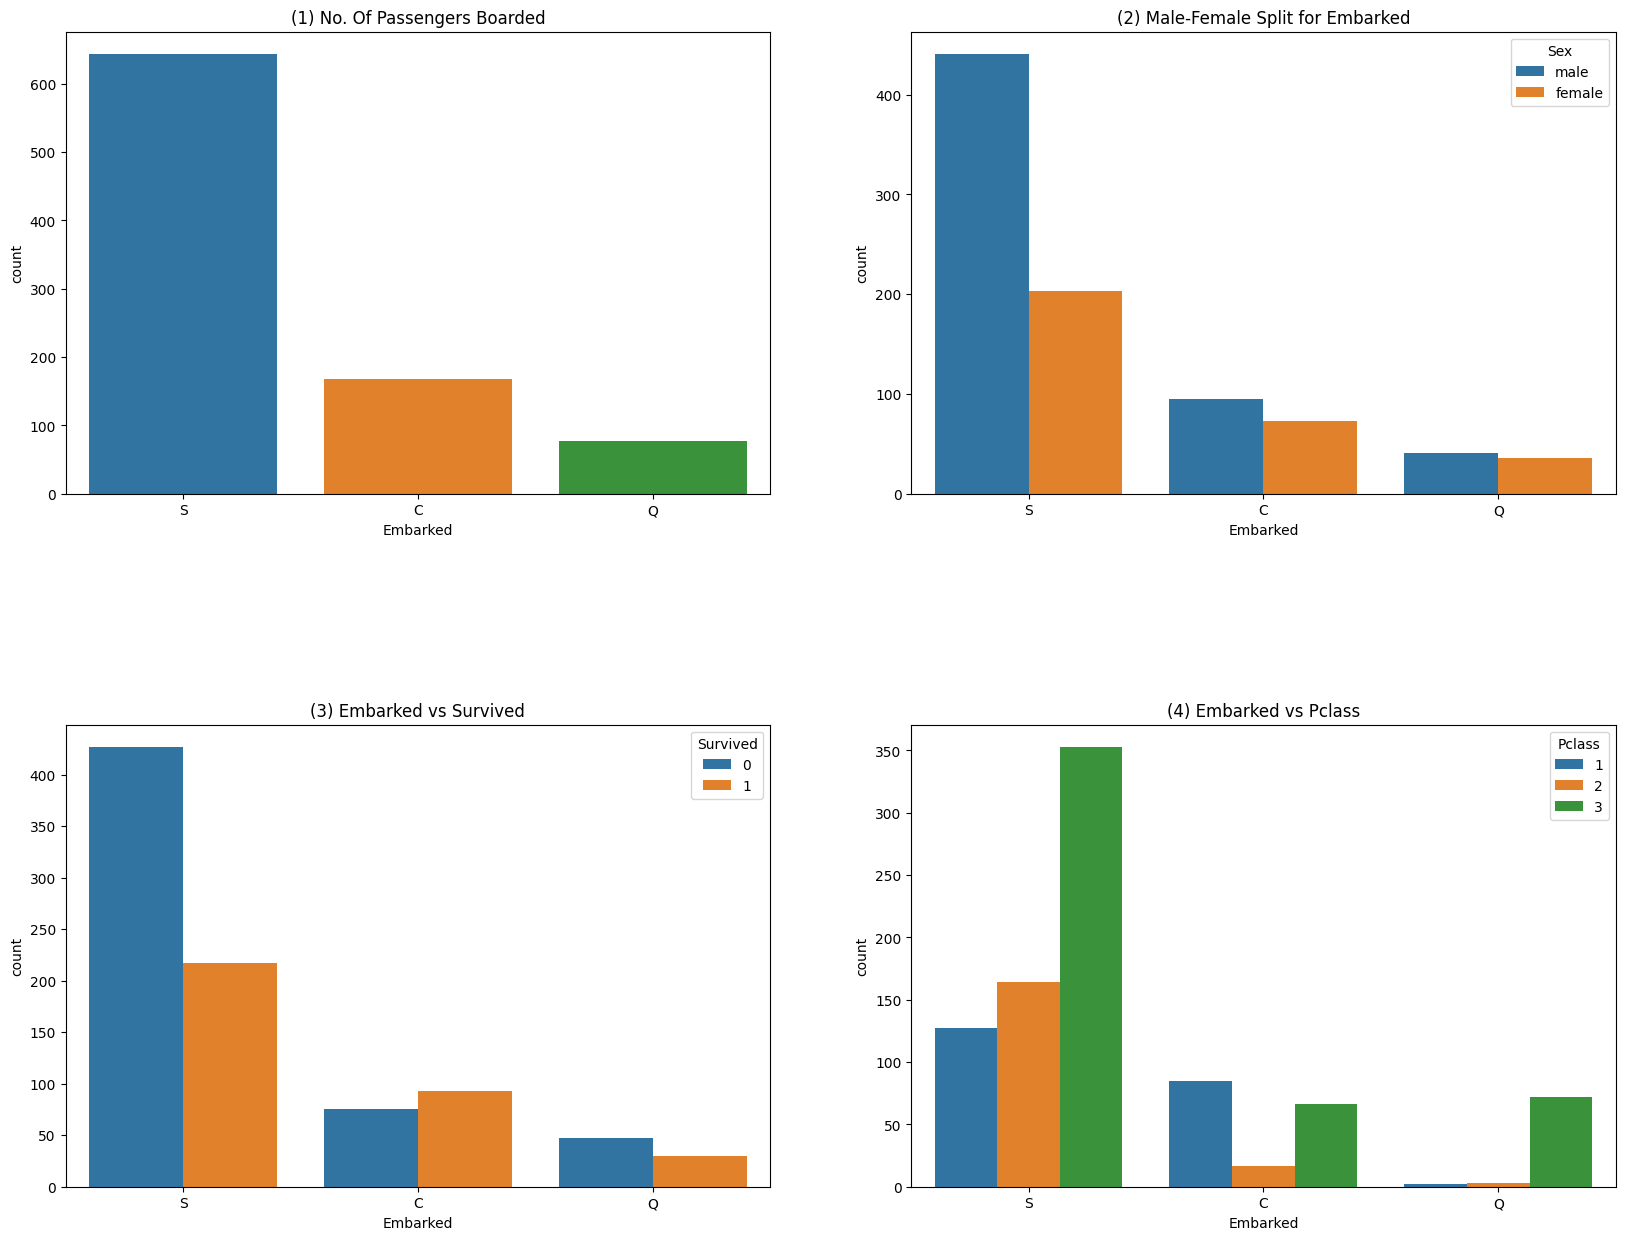

In [29]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [31]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

print("Maximum size of Family: ", df_train['FamilySize'].max()) 
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


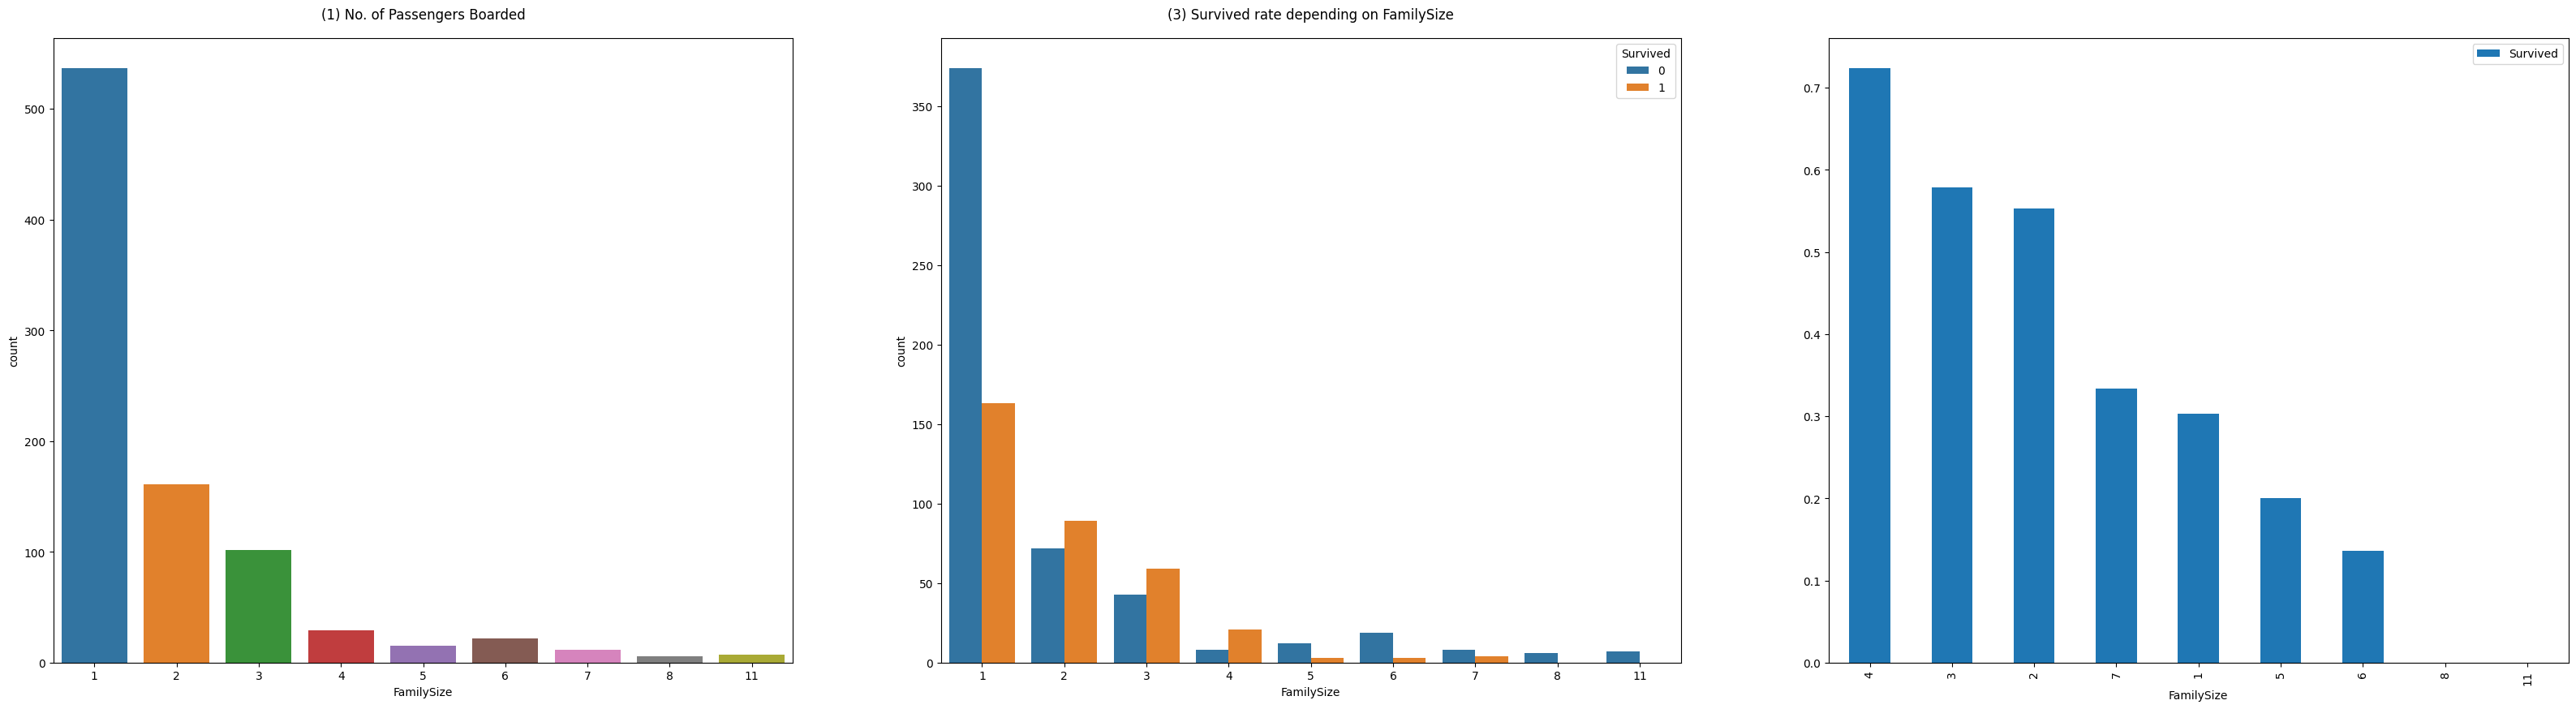

In [36]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']] \
    .groupby(['FamilySize'], as_index=True) \
    .mean() \
    .sort_values(by='Survived', ascending=False)\
    .plot.bar(ax=ax[2])
ax[1].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
